# Keras titancs (Using MLP)

## <font color='dark'>Import</font>

In [1]:
import urllib.request
import numpy as np
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
import os
np.random.seed(10)

Using TensorFlow backend.


## <font color='dark'>Load Data</font>

In [2]:
url = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath = "data/titanic3.xls"

if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath)
    print('Download : ',result)

In [3]:
all_df = pd.read_excel(filepath)
all_df[:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# choose the columns you want
cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df = all_df[cols]
all_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


## <font color='dark'>Preprocessing Data</font>

### filling the NULL value and doing the onehot encoding

In [5]:
# Remove the 'name' column
df = all_df.drop(['name'],axis=1)

In [6]:
# Deal with null value, fill with mean value
print( all_df.isnull().sum() )

age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)

fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64


In [7]:
# Change the label
## female 0 ; male 1
df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int)

# Onehot encoding to embarked
x_onehot_df = pd.get_dummies(data=df, columns=['embarked'])

In [8]:
x_onehot_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1
2,0,1,0,2.0000,1,2,151.5500,0,0,1
3,0,1,1,30.0000,1,2,151.5500,0,0,1
4,0,1,0,25.0000,1,2,151.5500,0,0,1


### Change the dataframe to array

In [9]:
ndarray = x_onehot_df.values

print("The shape of ndarray : ",ndarray.shape)

The shape of ndarray :  (1309, 10)


In [10]:
# 擷取 Feature 和 Label ， 我們想預測生存率，於是 label 選用 survival
Label = ndarray[:,0]
Feature = ndarray[:,1:]

print('Label : ',Label[:2])
print('Feature : \n',Feature[:2])

Label :  [1. 1.]
Feature : 
 [[  1.       0.      29.       0.       0.     211.3375   0.       0.
    1.    ]
 [  1.       1.       0.9167   1.       2.     151.55     0.       0.
    1.    ]]


### Doing the Minmaxscaler

In [11]:
minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures = minmaxscaler.fit_transform(Feature)

In [12]:
scaledFeatures[:2]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

### Split the train and test data

In [13]:
msk = np.random.rand(len(all_df))<0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [14]:
print('total : ',len(all_df),'train :',len(train_df),'test :',len(test_df))

total :  1309 train : 1034 test : 275


### <font color='blue'>Write the function</font> 

In [15]:
def Preprocessing(raw_df):
    df = raw_df.drop(['name'],axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)

    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int)
    x_onehot_df = pd.get_dummies(data=df, columns=['embarked'])
    ndarray = x_onehot_df.values
    Label = ndarray[:,0]
    Feature = ndarray[:,1:]
    minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmaxscaler.fit_transform(Feature)
    return scaledFeatures,Label

In [16]:
train_feature, train_label = Preprocessing(train_df)
test_feature, test_label = Preprocessing(test_df)

## <font color="dark">Build the model</font>

In [17]:
model = Sequential()

### Build the input layer and hidden layer 1

In [18]:
# 建立 9 個輸入層，40 個神經元隱藏層，  
# kernel_initializer 用 uniform distribution 隨機亂數產生，初始化 weight 和 bias
# activation 用 relu 的方式

model.add(Dense(units=40, input_dim=9,kernel_initializer='uniform',activation='relu'))

### Build the hidden layer 2

In [19]:
model.add(Dense(units=30,kernel_initializer='uniform',activation='relu'))

### Build the output layer

In [20]:
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


### Define the training way

In [22]:
model.compile(loss = 'binary_crossentropy', # 設定我們的 loss function，在 deep learning 使用 cross entropy 效果比較好
              optimizer = 'adam',                # 設定訓練時的優化方法，使用 adam 優化能夠使訓練更快收斂，提高準確率
              metrics = ['accuracy'])            # 評估模型的方式為 accuracy 來做評斷

## <font color='dark'>Train the model</font>

In [23]:
train_history = model.fit(x=train_feature,
                          y=train_label,
                          validation_split=0.1,
                          epochs=30,
                          batch_size=30,
                          verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6901 - acc: 0.5774 - val_loss: 0.6713 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6681 - acc: 0.5957 - val_loss: 0.5915 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6101 - acc: 0.6677 - val_loss: 0.4942 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5454 - acc: 0.7634 - val_loss: 0.4624 - val_acc: 0.7788
Epoch 5/30
 - 0s - loss: 0.5062 - acc: 0.7613 - val_loss: 0.4548 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4911 - acc: 0.7645 - val_loss: 0.4399 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4823 - acc: 0.7591 - val_loss: 0.4421 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4789 - acc: 0.7570 - val_loss: 0.4351 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4732 - acc: 0.7634 - val_loss: 0.4274 - val_acc: 0.7981
Epoch 10/30
 - 0s - loss: 0.4697 - acc: 0.7763 - val_loss: 0.4253 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.4657 - acc: 0.7613 - val_loss: 0.4222 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.4639 - acc:

In [24]:
import matplotlib.pyplot as plt 

# train_history 為訓練過程所產生的資料
# train 為 80%訓練用的資料的執行結果， validation 為20%用來驗證的資料的執行結果
def show_train_history(train_history, train, validation):       
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

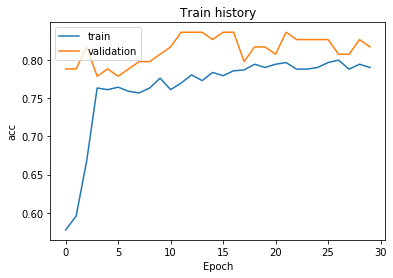

In [25]:
show_train_history(train_history, 'acc', 'val_acc')

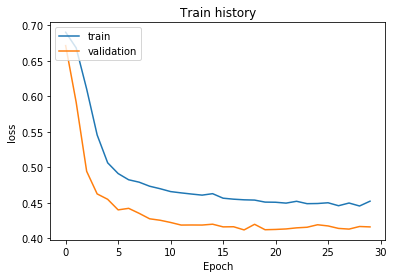

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(test_feature,test_label)
print(scores[1])

275/275 [==============================] - 0s 44us/step
0.8072727277062156


## <font color='dark'>Predict the value</font>

假設現在我們有男女主角的資料，那他們的生存機率為多少 ? 

In [28]:
Jack = pd.Series([0, 'Jack', 3, 'male', 23,1,0,5 ,'S'])
Rose = pd.Series([1, 'Rose', 1, 'female',20,1,0,100,'S'])

JR_df = pd.DataFrame([list(Jack),list(Rose)],columns=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])

In [29]:
all_df = pd.concat([all_df,JR_df])
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [30]:
all_feature, label = Preprocessing(all_df)

In [31]:
all_posibility = model.predict(all_feature)
all_posibility[:10]

array([[0.9771823 ],
       [0.61545104],
       [0.9724185 ],
       [0.4129311 ],
       [0.9714427 ],
       [0.27453688],
       [0.9497448 ],
       [0.32902315],
       [0.94814986],
       [0.28636816]], dtype=float32)

In [32]:
pd = all_df
pd.insert(len(all_df.columns),'probability',all_posibility)

In [33]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.149274
1,1,Rose,1,female,20.0,1,0,100.0,S,0.969934
